In [1]:
using Plots
using Random
using DataStructures
#using ColorShemes
#using SparseArrays
#using StatsBase
#using Statistics
#using DataFrames
#using StatsPlots
#using DelimitedFiles

In [23]:
function generate_lattice(n::Integer, p::Real)
    Random.seed!(42)
    lat = zeros(Int64, n+2, n+2)
    lat[2:end-1, 2:end-1] = Int8.(rand(n, n) .< p)
    return lat
end

function plot_lattice(lat::Matrix)
    m = maximum(lat) + 1
    colors = [:white, :green, :red, :black][1:m]
    heatmap(lat[2:end-1, 2:end-1], c = palette(colors), legend = :none)
    plot!(lims=(.5,size(lat)[1]-1.5))
    plot!(showaxis = false, ticks = false, aspect_ratio = :equal)
    #savefig("lattice")
end

plot_lattice (generic function with 1 method)

## Task 1


In [3]:
"""
we implement the Hoshen-Kopelman algorithm which labels all clusters and outputs the size of each
"""

    

function hoshen_Koppelman!(L::Matrix)
    M = Array{Int64}(undef, 1)
    M[1] = 0 # array which stores the size of each cluster which has index = cluster-label
    K = 1
    ende = size(L,1)-1
    
    for j in 2:ende
        for i in 2:ende
            if L[j,i] == 1
    
                k1 = L[j-1,i]
                k2 = L[j,i-1]
                if k1>1
                    while(M[k1]<0)
                        k1 = -M[k1]
                    end
                end
                if k2>2
                    while(M[k2]<0)
                        k2 = -M[k2]
                    end
                end
                if k1 == 0 && k2 == 0
                    K+=1
                    push!(M,1)
                    L[j,i] = K
                elseif k1 != 0 && k2 == 0
                    L[j,i] = k1
                    M[k1]+=1   
                elseif k1 == 0 && k2 != 0
                    L[j,i] = k2
                    M[k2]+=1
                elseif k1 == k2
                    L[j,i] = k1
                    M[k1]+=1   
                else
                    L[j,i] = k1
                    M[k1] += 1 + M[k2]
                    M[k2] = -k1
                end
            end       
        end
    end
    return M
end

hoshen_Koppelman! (generic function with 1 method)

In [4]:
test = generate_lattice(20,0.592)
M = hoshen_Koppelman!(test)

42-element Vector{Int64}:
   0
   1
   1
  -5
  -8
   1
   2
 -22
   5
  -9
  -5
  -8
  -8
   ⋮
 -27
  40
 -22
 -36
   1
  15
   5
   2
   6
 -36
   1
   3

## Task 2

In [5]:
function get_Nₛ(M)
    M[M.<1] .= 0
    Nₛ = []
    for s in 1:maximum(M)
        push!(Nₛ,count(i->(i==s),M))
    end
    return Nₛ
end
        
        

get_Nₛ (generic function with 1 method)

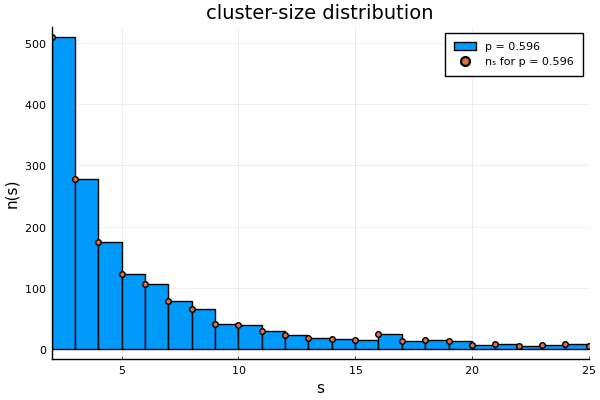

In [53]:
L = 400
p = 0.596
test = generate_lattice(L,p)
M = hoshen_Koppelman!(test)

Nₛ = get_Nₛ(M)
nₛ = Nₛ ./ L^2

M[M.<1] .= 0
x = LinRange(2,25,24)
lin = LinRange(2,25,100)


pyplot()


histogram(M, bins=2:100,label = "p = $p",xlims=(2,25))
scatter!(x,Nₛ[2:25],label = "nₛ for p = $p")
plot!(title="cluster-size distribution",xlabel = "s",ylabel = "n(s)")







    
    
    
    


[0, -3, -4, -10, -4, 9, -4, 1, -6, 49, 4, -11, 2]
[0, -3, -4, -10, -4, 9, -4, 1, -6, 49, 4, -11, 2]
[0, 0, 0, 0, 0, 9, 0, 1, 0, 49, 4, 0, 2]
[0, 0, 0, 0, 0, 9, 0, 1, 0, 49, 4, 0, 2]
